# Music Popularity Predictive Model
Author: Carlos Garza

## Overview
This notebook details the building, tuning, and deployment of a model that predicts a song's popularity on spotify.

## Business Problem
In the music industry, an important metric that has surfaced in the last few years is an artist's Spotify numbers. Many entities in the industry, from venues to record labels, will check an artist's spotify numbers before choosing to work with or book them and, for better or worse, will base their decision in part on the artist's performance on the platform.

This increase in Spotify metric importance has opened opportunities for optimization in the pop and Nashville country music workflow. Typically, a producer or songwriter will rent studio time and hire studio musicians to produce singles that can then be pitched to artists. Artists buy these songs and rerecord them with their own studio teams to be released as singles or as part of a record. 

If producers had a model that they could use to evaluate their music while in the production and could deliver a model's predictions while pitching music, they would have a new edge in the industry.

## Data
The data for this project originates from the Spotify API. The data used for this model training was organized and uploaded to Kaggle by user Yamac Eren Ay, and can be found [here](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data.csv).

The data describes 174,389 songs. Specifics features of the data are explored below.

In [1]:
# import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import data
df = pd.read_csv('data/data.csv')
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [4]:
to_drop = ['id', 'release_date']
cat_columns = ['artists', 'explicit', 'key', 'mode', 'name']
cont_columns = ['acousticness', 'danceability', 'duration_ms',
                'energy', 'instrumentalness', 'liveness',
                'loudness', 'popularity', 'speechiness',
                'tempo', 'valence', 'year']

In [5]:
df.drop(to_drop, axis=1, inplace=True)
cont_df = df[cont_columns]
cat_df = df[cont_columns]
cont_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,year
0,0.991000,0.598,168333,0.224,0.000522,0.3790,-12.628,12,0.0936,149.976,0.6340,1920
1,0.643000,0.852,150200,0.517,0.026400,0.0809,-7.261,7,0.0534,86.889,0.9500,1920
2,0.993000,0.647,163827,0.186,0.000018,0.5190,-12.098,4,0.1740,97.600,0.6890,1920
3,0.000173,0.730,422087,0.798,0.801000,0.1280,-7.311,17,0.0425,127.997,0.0422,1920
4,0.295000,0.704,165224,0.707,0.000246,0.4020,-6.036,2,0.0768,122.076,0.2990,1920


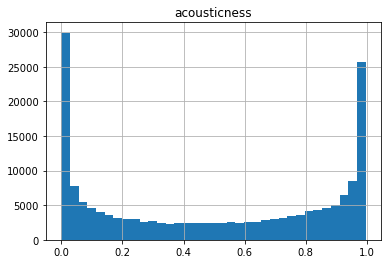

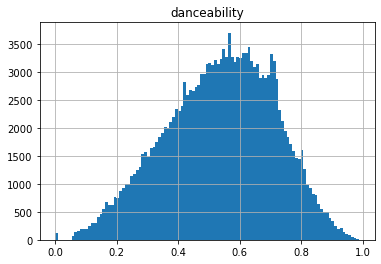

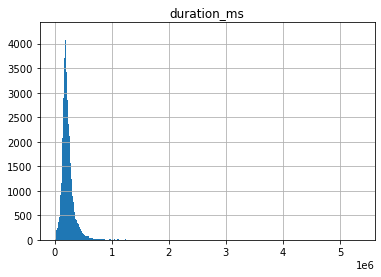

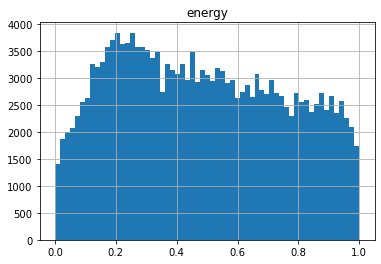

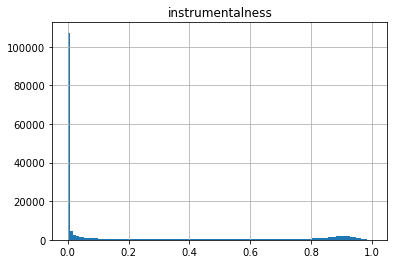

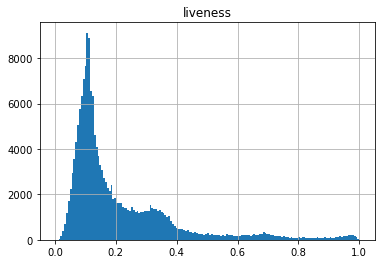

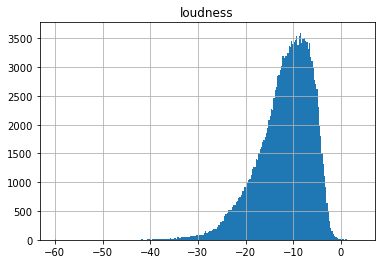

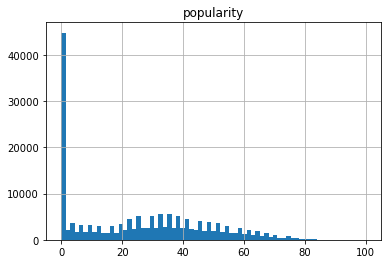

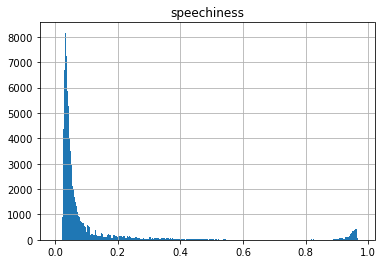

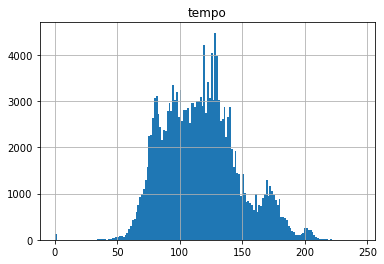

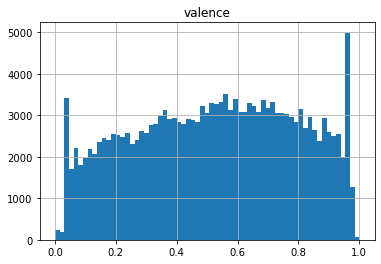

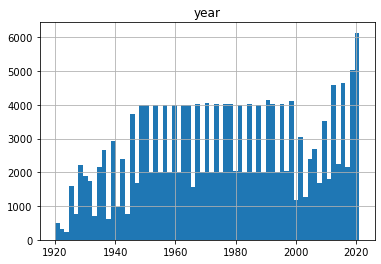

In [36]:
for column in cont_df.columns:
    plt.figure()
    cont_df[column].hist(bins='auto')
    plt.title(column)

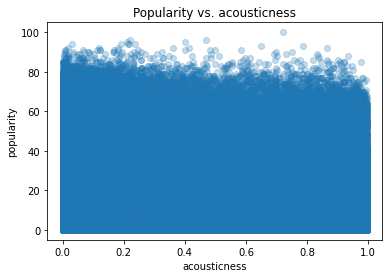

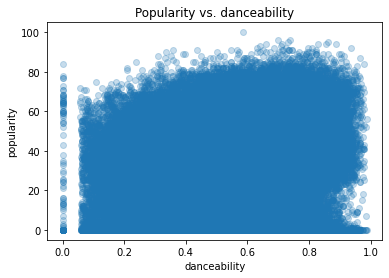

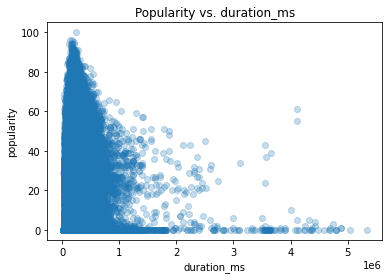

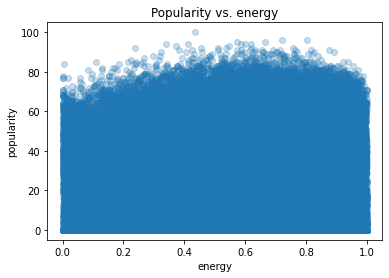

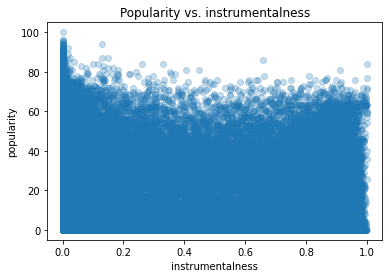

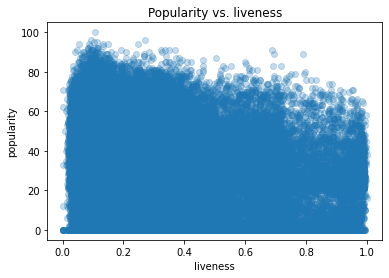

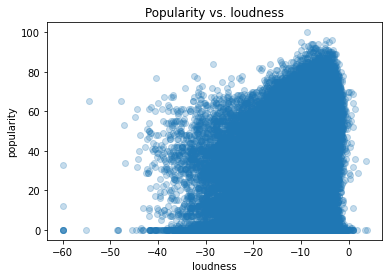

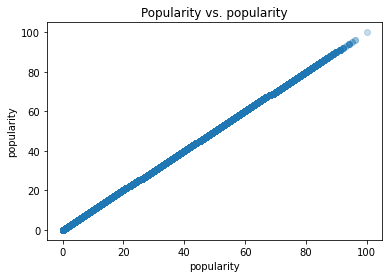

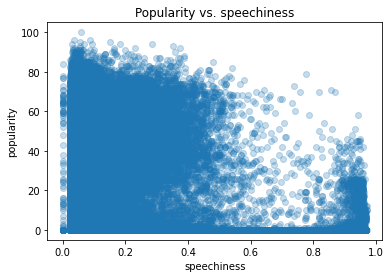

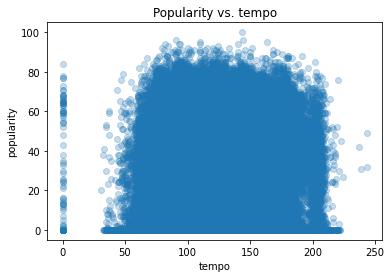

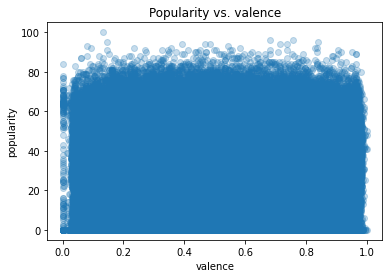

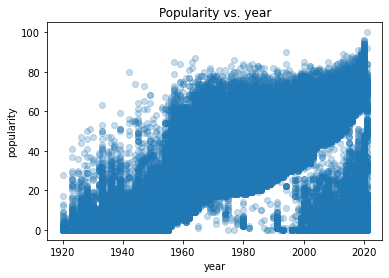

In [15]:
for column in cont_df.columns:
    plt.figure()
    plt.scatter(df[column], df.popularity, alpha=0.25)
    plt.title(f'Popularity vs. {column}')
    plt.xlabel(column)
    plt.ylabel('popularity')

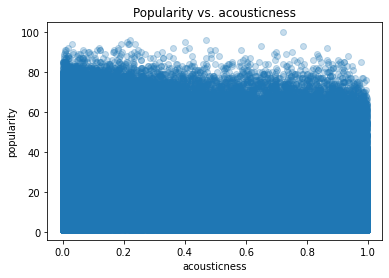

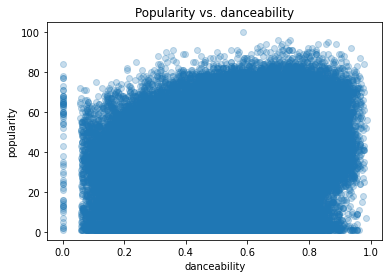

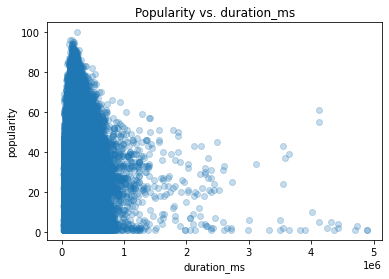

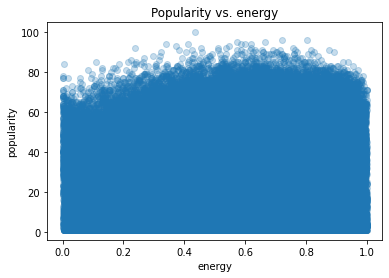

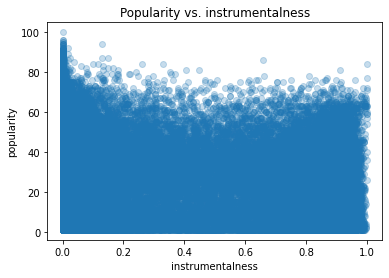

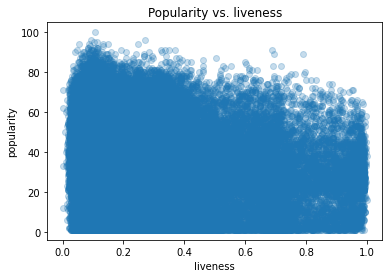

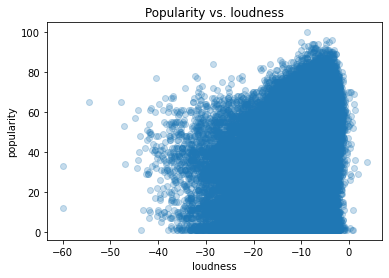

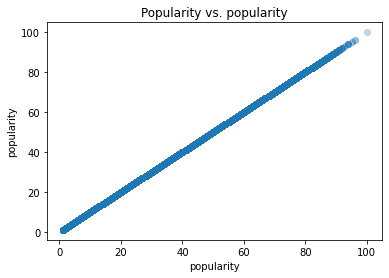

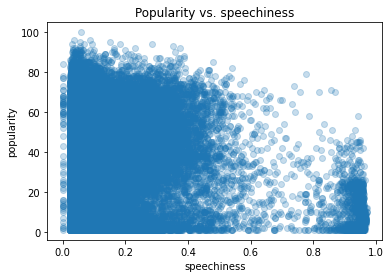

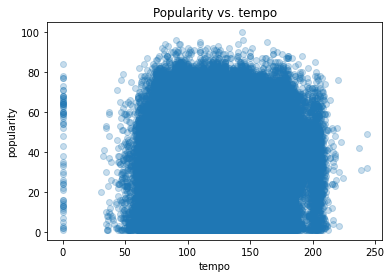

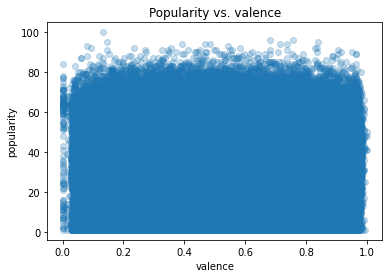

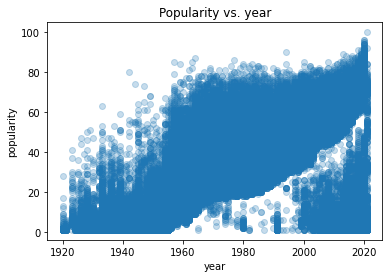

In [19]:
for column in cont_df.columns:
    plt.figure()
    plt.scatter(df[df['popularity']>0][column], df[df['popularity']>0]['popularity'], alpha=0.25)
    plt.title(f'Popularity vs. {column}')
    plt.xlabel(column)
    plt.ylabel('popularity')

In [31]:
for column in cat_columns:
    print(column, '\n')
    print(df[column].value_counts().head())
    print('------')

artists 

['Tadeusz Dolega Mostowicz']    1281
['Эрнест Хемингуэй']            1175
['Эрих Мария Ремарк']           1062
['Francisco Canaro']             951
['Ignacio Corsini']              624
Name: artists, dtype: int64
------
explicit 

0    162507
1     11882
Name: explicit, dtype: int64
------
key 

0    21967
7    21363
2    18916
9    18109
5    16546
Name: key, dtype: int64
------
mode 

1    122488
0     51901
Name: mode, dtype: int64
------
name 

White Christmas      103
Winter Wonderland     88
Silent Night          81
Jingle Bells          71
2000 Years            70
Name: name, dtype: int64
------


In [ ]:
to_drop_2 = ['name', 'artists', 'instrumentalness']

## Data Preprocessing

## Baseline Models

## Model Tuning

## Model Evaluation

## Conclusions

## Future Work